## Stage D
### Import data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Training data: {},{}".format(X_train.shape, y_train.shape))
print( "Test data : {},{}".format(X_test.shape, y_test.shape))

Training data: (60000, 28, 28),(60000,)
Test data : (10000, 28, 28),(10000,)


In [ ]:
class_labels = np.unique(y_train) 
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


### Data visualization

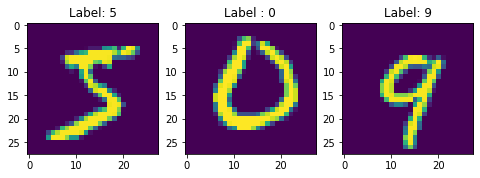

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)

plt.imshow(X_train[0])
plt.title("Label: {}".format(y_train[0]))

plt.subplot(1,3,2)
plt.imshow(X_train[2500])
plt.title("Label : {}".format(y_train[2500]))

plt.subplot(1,3,3)
plt.imshow(X_test[12])
plt.title("Label: {}".format(y_test[12]))

plt.show()

### Reshape the data
We convert the input images from 3d to 2d vectors. Otherwise we transform 28x28 vector to single dimensional vector of 1x784.

In [ ]:
# reshape X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

# reshape X_test
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [ ]:
print("Number of training examples:", X_train.shape[0], "and each image is of shape", X_train.shape[1])
print("Number of training examples", X_test.shape[0], "and each image is of shape", X_test.shape[1])

Number of training examples: 60000 and each image is of shape 784
Number of training examples 10000 and each image is of shape 784


### Normalization
The range of our data goes from 0 (white) to 250 (black). Let's normalize our data using : X = X-min(X) / max(X)-min(X)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

### Label encoding
We need to convert the labels for the MLP, for example 6 will be 0,0,0,1,0...

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Label of the 1st picture: ",y_train[0])

y_train = to_categorical(y_train, 10)   # for 10 labels
y_test = to_categorical(y_test, 10)  # it's one hot encoding

print ("Same label after converting: ",y_train[0])

Label of the 1st picture:  5
Same label after converting:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Data modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#model = Sequential()
#model.add(Dense(10, input_dim=784))
#model.add(Activation('Softmax'))

In [ ]:
from keras.optimizers import SGD
#model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

### Data Modeling

In [ ]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import he_normal
from keras.layers import BatchNormalization

#paramters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [ ]:
# Initialising model
model_drop = Sequential()

# Adding first hidden layer
model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))

# Adding Batch Normalization
model_drop.add(BatchNormalization())

# Adding dropout to first hidden layer
model_drop.add(Dropout(0.5))

# Adding second hidden layer
model_drop.add(Dense(52, activation='relu', kernel_initializer='he_normal'))

# Adding Batch Normalization
model_drop.add(BatchNormalization())

# Adding dropout to second hidden layer
model_drop.add(Dropout(0.5))

# Adding output layer
model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 364)               285740    
                                                                 
 batch_normalization_2 (Batc  (None, 364)              1456      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 364)               0         
                                                                 
 dense_4 (Dense)             (None, 52)                18980     
                                                                 
 batch_normalization_3 (Batc  (None, 52)               208       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 52)               

In [ ]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5405 - accuracy: 0.8392 - val_loss: 0.1760 - val_accuracy: 0.9460
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2588 - accuracy: 0.9257 - val_loss: 0.1259 - val_accuracy: 0.9628
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2066 - accuracy: 0.9410 - val_loss: 0.1063 - val_accuracy: 0.9665
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1786 - accuracy: 0.9476 - val_loss: 0.0943 - val_accuracy: 0.9706
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1524 - accuracy: 0.9557 - val_loss: 0.0866 - val_accuracy: 0.9726
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1410 - accuracy: 0.9590 - val_loss: 0.0810 - val_accuracy: 0.9761
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1313 - accuracy: 0.9617 - val_loss: 0.0812 - val_accuracy: 0.9756
Epoc

In [ ]:
score_drop = model_drop.evaluate(X_test, y_test, verbose=0)

print('Test score:', score_drop[0])
print('Test accuracy:', score_drop[1])

Test score: 0.06511595845222473
Test accuracy: 0.9818000197410583


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_dynamic(X, vl, tl, colors=['b']):
  plt.plot(X, vl, 'b', label="Validation Loss")
  plt.plot(X, tl, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9818


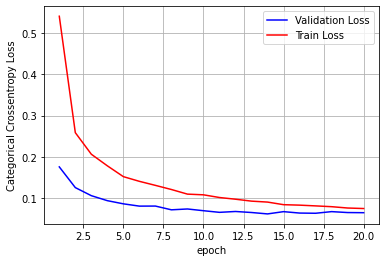

In [ ]:
# Create a plot of the model's loss and accuracy
fig, ax = plt.subplots(1, 1)

ax.set_xlabel("epoch")
ax.set_ylabel("Categorical Crossentropy Loss")

# Plot test and train accuracy of the model
# print(history.history.keys())
model_drop_test_score = model_drop.evaluate(X_test, y_test)[0]
model_drop_test_acc = model_drop.evaluate(X_test, y_test)[1]
model_drop_train_acc = history.history['accuracy']

# List of epoch numb
X = list(range(1, nb_epoch+1))

test_loss = history.history['val_loss']
train_loss = history.history['loss']
plt_dynamic(X, test_loss, train_loss)

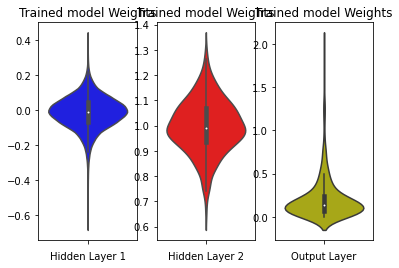

In [ ]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')

plt.show()

### HDSC part of modeling

In [ ]:
# Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1000)

Epoch 1/20
60/60 [==============================] - 2s 27ms/step - loss: 0.6067 - accuracy: 0.8384 - val_loss: 0.2444 - val_accuracy: 0.9315
Epoch 2/20
60/60 [==============================] - 1s 23ms/step - loss: 0.2069 - accuracy: 0.9404 - val_loss: 0.1727 - val_accuracy: 0.9514
Epoch 3/20
60/60 [==============================] - 1s 23ms/step - loss: 0.1506 - accuracy: 0.9571 - val_loss: 0.1379 - val_accuracy: 0.9588
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.1192 - accuracy: 0.9662 - val_loss: 0.1170 - val_accuracy: 0.9647
Epoch 5/20
60/60 [==============================] - 1s 23ms/step - loss: 0.0958 - accuracy: 0.9723 - val_loss: 0.1019 - val_accuracy: 0.9706
Epoch 6/20
60/60 [==============================] - 1s 23ms/step - loss: 0.0782 - accuracy: 0.9783 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 7/20
60/60 [==============================] - 1s 23ms/step - loss: 0.0661 - accuracy: 0.9810 - val_loss: 0.0851 - val_accuracy: 0.9739
Epoch 8/20
60

In [ ]:
test_loss2, test_accuracy2 = model.evaluate(X_test, y_test)
print('Test loss: {}'.format(test_loss2))
print('Test accuracy: {}'.format(test_accuracy2))

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9793
Test loss: 0.0692894235253334
Test accuracy: 0.9793000221252441


Text(0.5, 1.0, 'Loss Curves before regularisation')

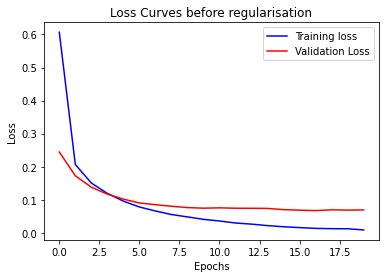

In [ ]:
# Check for overfitting
import matplotlib.pyplot as plt

plt.figure()

plt.plot(history2.history['loss'], 'blue')
plt.plot(history2.history['val_loss'], 'red')

plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves before regularisation')

Although the validation and training loss seem great, we can see that **the validation loss increases**. **This identifies overfitting in our network**. How do we proceed? Introduce regularisation to the model.

In [ ]:
from tensorflow.keras.layers import Dropout

reg_model = Sequential()

reg_model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(output_dim, activation='softmax'))

In [ ]:
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
reg_history = reg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=1000)

Epoch 1/20
60/60 [==============================] - 2s 28ms/step - loss: 0.8771 - accuracy: 0.7264 - val_loss: 0.2815 - val_accuracy: 0.9180
Epoch 2/20
60/60 [==============================] - 2s 27ms/step - loss: 0.3431 - accuracy: 0.8980 - val_loss: 0.1944 - val_accuracy: 0.9415
Epoch 3/20
60/60 [==============================] - 2s 26ms/step - loss: 0.2577 - accuracy: 0.9259 - val_loss: 0.1565 - val_accuracy: 0.9518
Epoch 4/20
60/60 [==============================] - 2s 26ms/step - loss: 0.2128 - accuracy: 0.9374 - val_loss: 0.1320 - val_accuracy: 0.9589
Epoch 5/20
60/60 [==============================] - 2s 26ms/step - loss: 0.1818 - accuracy: 0.9470 - val_loss: 0.1149 - val_accuracy: 0.9648
Epoch 6/20
60/60 [==============================] - 2s 26ms/step - loss: 0.1604 - accuracy: 0.9525 - val_loss: 0.1058 - val_accuracy: 0.9663
Epoch 7/20
60/60 [==============================] - 2s 26ms/step - loss: 0.1414 - accuracy: 0.9579 - val_loss: 0.0980 - val_accuracy: 0.9700
Epoch 8/20
60

In [ ]:
test_loss3, test_accuracy3 = reg_model.evaluate(X_test, y_test)
print('Test loss: {}'.format(test_loss3))
print('Test accuracy: {}'.format(test_accuracy3))

313/313 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9797
Test loss: 0.0643000528216362
Test accuracy: 0.9797000288963318


Text(0.5, 1.0, 'Loss Curves after regularisation')

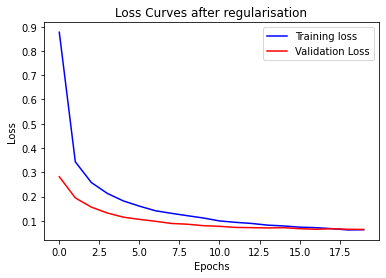

In [ ]:
# Check for overfitting
import matplotlib.pyplot as plt

plt.figure()

plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')

plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves after regularisation')